In [48]:
import os, pickle
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import evals.teaching_evals as evals
import pickle
import utils
subtitles = []
# legend = ["butterfly","moth"]
y_train = np.array([0]*80+[1]*80)
y_valid = np.array([0]*20+[1]*20)

In [21]:
linewidth = 4.0

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
def vis_all_knn_scores(m_range, all_scores, legend=None, title=None, save=False):
    plt.figure(figsize=(16,10))

    for i, scores in enumerate(all_scores):
        if i == 0:
            full_knn_score = scores    
            plt.axhline(full_knn_score, c='black', linewidth=2.0)
        elif i == 1:
            random_knn_scores, random_knn_ci = scores
            plt.plot(m_range, random_knn_scores, linewidth=2.0)
            plt.fill_between(m_range, random_knn_scores + random_knn_ci / 2, random_knn_scores - random_knn_ci / 2, alpha=0.5)
        else:
            plt.plot(m_range, scores, linewidth=linewidth)#, c=colors[i])

        # plt.set_xticks(m_range)
        plt.legend(legend)

    if not title:
        title = "knn_scores"
    plt.title(title)
    if save:
        plt.savefig(f"{title}.png", dpi=300)

In [63]:
proto_idx = evals.protogreedy(MTL_human, 10)
triplets = pickle.load(open("data/bm_triplets/3c2_unique=182/train_triplets.pkl","rb"))

In [65]:
triplets = np.array(triplets)

In [69]:
proto_triplets = []
for t in triplets:
    t = list(t)
    for x in t:
        if x in proto_idx and t not in proto_triplets: proto_triplets.append(t)

In [71]:
a = torch.tensor([1,2])
list(a)

[tensor(1), tensor(2)]

In [62]:
int(a)

1

In [42]:
np.unique(proto_triplets)

array([  0,   3,   4,   5,   7,   9,  12,  13,  16,  17,  18,  21,  23,
        27,  28,  29,  30,  33,  36,  40,  41,  46,  49,  50,  51,  52,
        53,  62,  64,  65,  66,  68,  71,  73,  74,  76,  81,  82,  83,
        84,  86,  87,  88,  90,  91,  92,  94,  97,  98,  99, 100, 102,
       103, 105, 107, 109, 117, 120, 121, 123, 124, 128, 129, 130, 133,
       137, 141, 143, 146, 148, 154, 155, 156, 158])

## load data

In [3]:
dwac = "/net/scratch/hanliu-shared/data/bm/embs/dwac_train_emb10.merged10.pkl"
resn = "embeds/bm/resn_train_emb10.pkl"
TN_lpips = "embeds/bm/lpips/TN_train_emb10.pkl"
MTL_lpips = "embeds/bm/lpips/MTL.BCETN_train_emb10.pkl"
TN_human = "embeds/bm/human/TN_train_emb10.pkl"
MTL_human = "embeds/bm/human/MTL.BCETN_train_emb10.pkl"

In [4]:
dwac = pickle.load(open(dwac, "rb"))[3]
resn = pickle.load(open(resn,"rb"))
TN_lpips = pickle.load(open(TN_lpips,"rb"))
MTL_lpips = pickle.load(open(MTL_lpips,"rb"))
TN_human = pickle.load(open(TN_human,"rb"))
MTL_human = pickle.load(open(MTL_human,"rb"))

In [5]:
embeds = {"dwac": dwac, 
"resn": resn, 
"TN_lpips": TN_lpips,
"MTL_lpips":MTL_lpips,
"TN_human":TN_human,
"MTL_human": MTL_human}
legend = ['full', 'random', 'random_ci'] + list(embeds.keys())

In [6]:
selection_alg = "protogreedy"
m_range = np.arange(2,21)

## knn using lpips

In [7]:
knn_dist = "lpips"
full_score = evals.get_lpips_knn_score()
random_scores = evals.get_random_knn_scores(knn_dist=knn_dist, m_range=m_range)
lpips_scores = [full_score, random_scores]
lpips_scores

[0.825,
 (array([0.577  , 0.581  , 0.60075, 0.6085 , 0.612  , 0.607  , 0.62375,
         0.64025, 0.65625, 0.6365 , 0.65775, 0.65575, 0.68075, 0.667  ,
         0.6735 , 0.67275, 0.6775 , 0.68625, 0.7135 ]),
  array([0.0552415 , 0.04755101, 0.04641539, 0.0412619 , 0.04435679,
         0.04486049, 0.0397938 , 0.04343758, 0.04495557, 0.0457023 ,
         0.04103175, 0.03817382, 0.04258135, 0.0382785 , 0.03580765,
         0.03933443, 0.03989672, 0.03551645, 0.0379535 ]))]

In [8]:
for sub, embed in embeds.items():
    lpips_scores.append(evals.get_prototype_knn_scores(embed, knn_dist=knn_dist, m_range=m_range, selection_alg=selection_alg))

[0.525, 0.6, 0.525, 0.525, 0.45, 0.45, 0.45, 0.575, 0.6, 0.575, 0.675, 0.675, 0.8, 0.8, 0.75, 0.7, 0.7, 0.7, 0.65]
[0.55, 0.725, 0.725, 0.8, 0.75, 0.75, 0.75, 0.75, 0.725, 0.7, 0.675, 0.675, 0.675, 0.675, 0.675, 0.675, 0.7, 0.725, 0.725]
[0.65, 0.575, 0.425, 0.425, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.55, 0.55, 0.55, 0.55, 0.55]
[0.65, 0.75, 0.775, 0.675, 0.675, 0.65, 0.65, 0.75, 0.725, 0.7, 0.725, 0.725, 0.725, 0.65, 0.675, 0.675, 0.675, 0.7, 0.7]
[0.6, 0.525, 0.55, 0.55, 0.7, 0.75, 0.725, 0.725, 0.725, 0.8, 0.775, 0.775, 0.725, 0.7, 0.7, 0.7, 0.7, 0.7, 0.725]
[0.7, 0.65, 0.7, 0.7, 0.725, 0.7, 0.7, 0.575, 0.55, 0.55, 0.65, 0.675, 0.675, 0.675, 0.675, 0.675, 0.675, 0.65, 0.65]


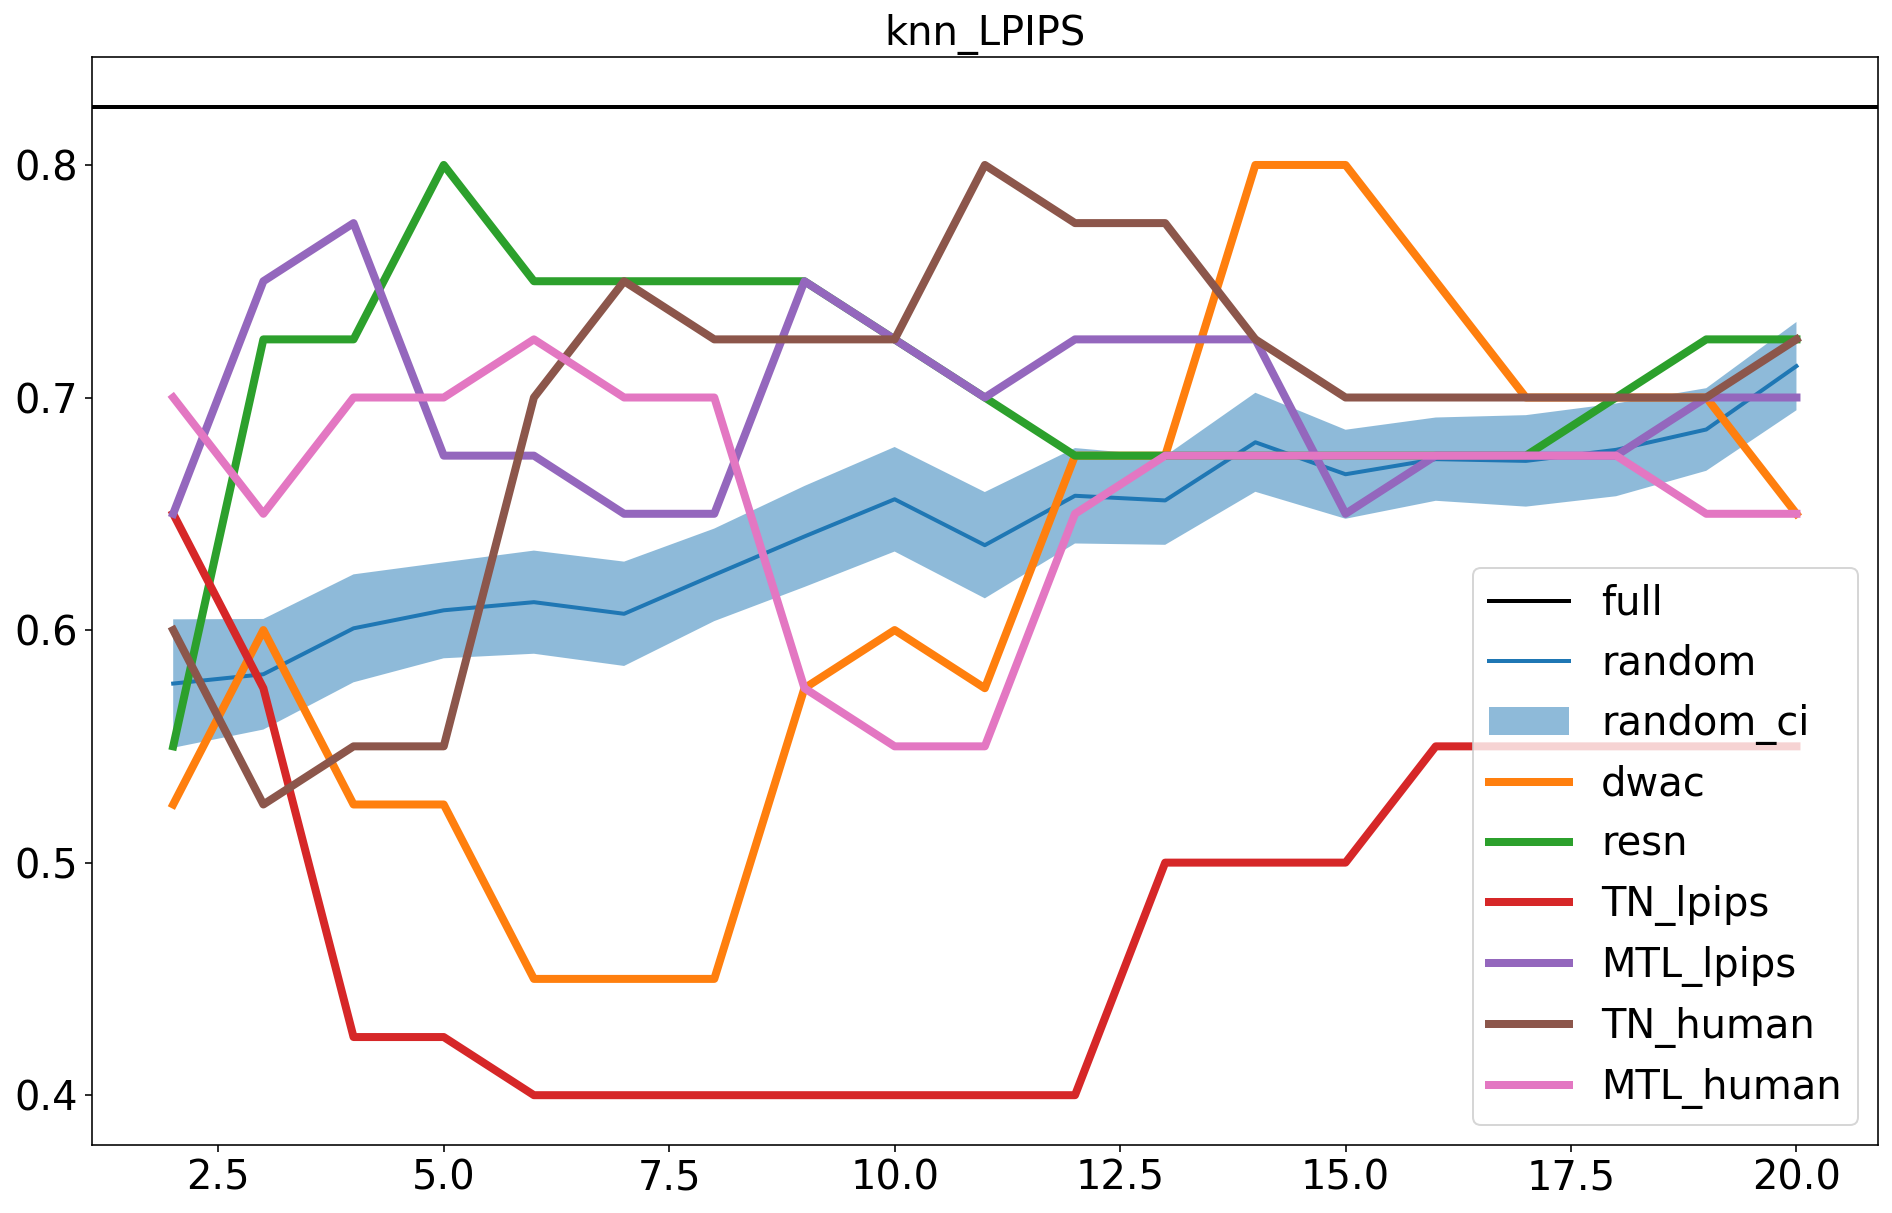

In [22]:
vis_all_knn_scores(m_range, lpips_scores, legend=legend, title="knn_LPIPS", save=True)

## knn using human triplets

In [10]:
knn_dist = "htriplets"
full_score = evals.get_htriplet_knn_score()
random_scores = evals.get_random_knn_scores(knn_dist=knn_dist, m_range=m_range)
htriplet_scores = [full_score, random_scores]
htriplet_scores

[0.85,
 (array([0.673  , 0.66725, 0.69225, 0.6725 , 0.68575, 0.71675, 0.73375,
         0.76525, 0.76325, 0.7685 , 0.76775, 0.76575, 0.7875 , 0.79025,
         0.79425, 0.79175, 0.8105 , 0.82975, 0.82625]),
  array([0.05192006, 0.05648756, 0.05034539, 0.05071539, 0.05410633,
         0.04649244, 0.04021629, 0.0343067 , 0.03891156, 0.03678823,
         0.03923826, 0.03580307, 0.03461267, 0.03510877, 0.03291524,
         0.03584192, 0.02938268, 0.0261042 , 0.02877391]))]

In [11]:
for sub, embed in embeds.items():
    htriplet_scores.append(evals.get_prototype_knn_scores(embed, knn_dist=knn_dist, m_range=m_range, selection_alg=selection_alg))

[0.725, 0.5, 0.5, 0.5, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.825, 0.825, 0.75, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]
[0.875, 0.8, 0.775, 0.625, 0.675, 0.675, 0.675, 0.75, 0.75, 0.75, 0.75, 0.725, 0.75, 0.75, 0.775, 0.775, 0.775, 0.75, 0.75]
[0.55, 0.55, 0.575, 0.525, 0.525, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
[0.55, 0.425, 0.5, 0.45, 0.475, 0.475, 0.475, 0.6, 0.6, 0.6, 0.6, 0.625, 0.725, 0.7, 0.7, 0.7, 0.8, 0.75, 0.75]
[0.7, 0.7, 0.9, 0.9, 0.9, 0.875, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.825, 0.825, 0.825, 0.825, 0.825]
[0.775, 0.775, 0.9, 0.875, 0.875, 0.875, 0.875, 0.9, 0.9, 0.9, 0.875, 0.875, 0.825, 0.825, 0.85, 0.85, 0.85, 0.85, 0.85]


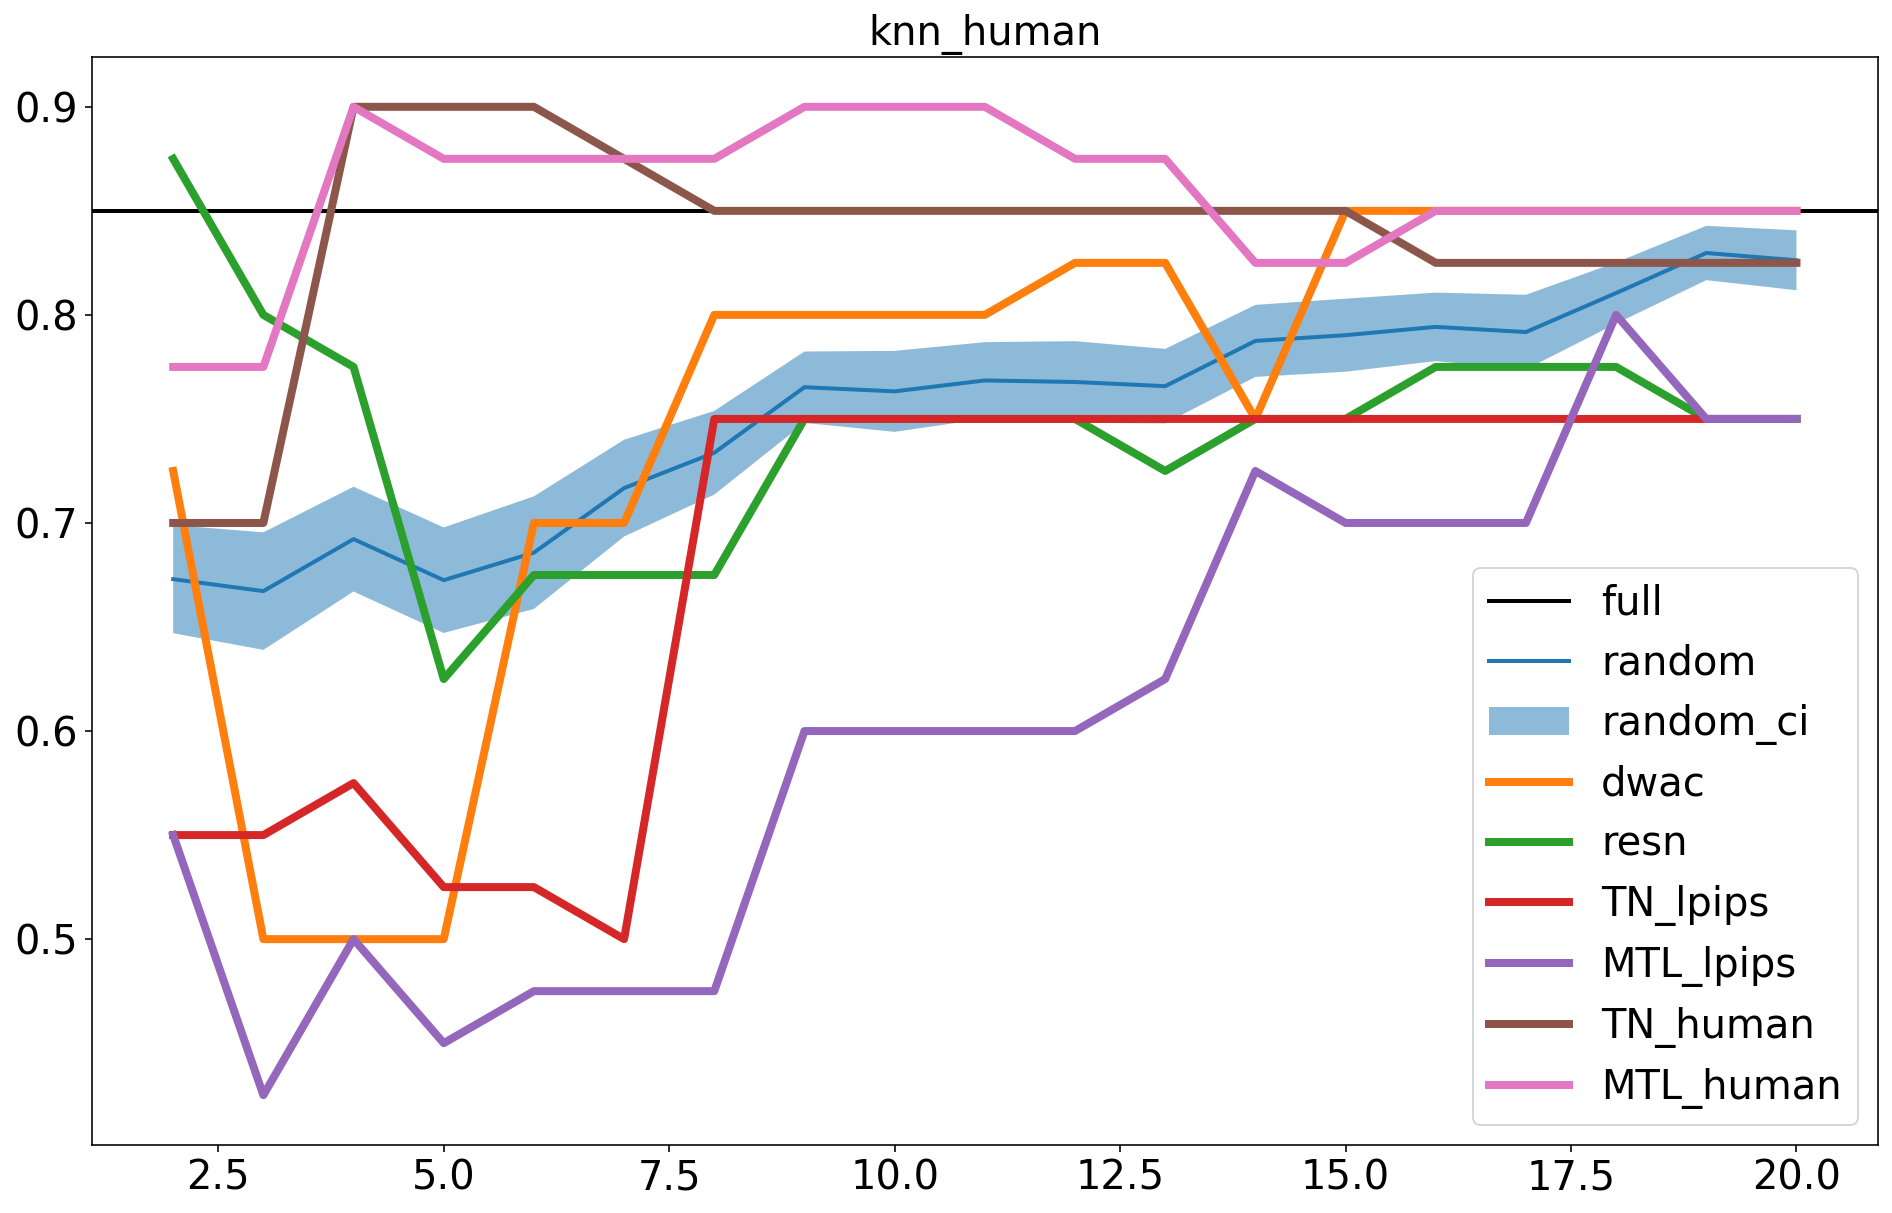

In [23]:
vis_all_knn_scores(m_range, htriplet_scores, legend=legend, title="knn_human", save=True)